**MNIST Handwritten Digit Classification using Deep Learning(Neural Network)**

In [ ]:
!pip install keras_utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras_utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=0db9b571a15eb98ce637d597b8a2b4e14e4d11316a2cc1fb1f82bbb8b3ffe804
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras_utils


In [ ]:
# restart the kernel
!kill -9 -1

In [ ]:
# reload the notebook
%reload_ext autoreload
%autoreload 2

In [1]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) #this gives the model randomness i.e, when ever we run we get different results
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import utils
from sklearn.metrics import accuracy_score

Loading the MNIST data from keras.datasets

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shapes of all np.ndarrays
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


Training data=60,000 images

test data=10,000 images

Image dimension->28 x 28

Grayscale images->1 channel

All the labels are stored in Y_train

In [5]:
#Printing the 10th image
print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [6]:
print(X_train[9].shape)

(28, 28)


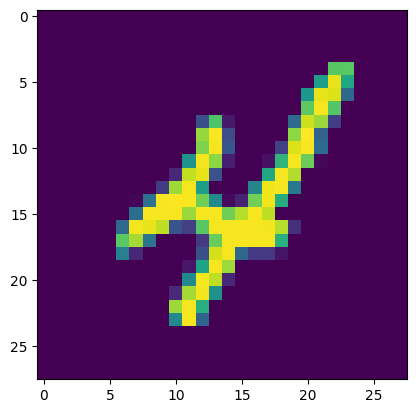

The label is: 4


In [7]:
#displaying image
plt.imshow(X_train[9])
plt.show()

#print the corresponding label
print("The label is:",Y_train[9])

Image Labels

In [8]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print("Unique value in Y_train:",np.unique(Y_train))

# unique values in Y_test
print("Unique value in Y_test",np.unique(Y_test))

Unique value in Y_train: [0 1 2 3 4 5 6 7 8 9]
Unique value in Y_test [0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply One Hot Encoding

All the images have the same dimension in this dataset if not we have to resize all this images to a common dimension.

We need to normalize or scale the data as it ranges from 0-255 ,as these are large values the model may take hours to process ,so we will normalize which  means converting the data to 0-1 range

In [10]:
#Scaling the values
X_train=X_train/255
X_test=X_test/255

In [11]:
#Printing the 10th image
print(X_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

we are using cnn here ,it is a popular neural network where cnn is for images and rnn is for text data

In [12]:
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
# compiling the sequential model
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_train, Y_train))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 63s 132ms/step - loss: 0.1997 - accuracy: 0.9419 - val_loss: 0.0771 - val_accuracy: 0.9780
Epoch 2/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0349 - val_accuracy: 0.9903
Epoch 3/10
469/469 [==============================] - 53s 114ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 4/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0156 - val_accuracy: 0.9962
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0159 - accuracy: 0.9955 - val_loss: 0.0125 - val_accuracy: 0.9962
Epoch 6/10
469/469 [==============================] - 62s 133ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0073 - val_accuracy: 0.9982
Epoch 7/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0059 - val_accuracy: 0.9

In [13]:
from tensorflow.keras.optimizers import SGD
model = Sequential()
# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
# compiling the sequential model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_train, Y_train))

Epoch 1/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2366 - accuracy: 0.9283 - val_loss: 0.1022 - val_accuracy: 0.9706
Epoch 2/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0722 - accuracy: 0.9783 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 3/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 4/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0264 - val_accuracy: 0.9925
Epoch 5/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.0176 - val_accuracy: 0.9952
Epoch 6/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0128 - val_accuracy: 0.9965
Epoch 7/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0107 -

In [102]:
from tensorflow.keras.optimizers import SGD
c_model = Sequential()
# convolutional layer
c_model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid',kernel_initializer='he_uniform', activation='relu', input_shape=(28,28,1)))
c_model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
c_model.add(Flatten())
# hidden layer
c_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# output layer
c_model.add(Dense(10, activation='softmax'))
# compiling the sequential model
opt = SGD(learning_rate=0.01, momentum=0.9)
c_model.add(Dense(10, kernel_initializer='he_uniform'))  # no activation here
c_model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# training the model for 10 epochs
c_model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_train, Y_train))

Epoch 1/15
1875/1875 [==============================] - 49s 26ms/step - loss: 1.0193 - accuracy: 0.5916 - val_loss: 0.7207 - val_accuracy: 0.6272
Epoch 2/15
1875/1875 [==============================] - 46s 25ms/step - loss: 0.6366 - accuracy: 0.6918 - val_loss: 0.5667 - val_accuracy: 0.6964
Epoch 3/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5412 - accuracy: 0.7247 - val_loss: 0.5135 - val_accuracy: 0.7601
Epoch 4/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4669 - accuracy: 0.8127 - val_loss: 0.4003 - val_accuracy: 0.8753
Epoch 5/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3276 - accuracy: 0.8820 - val_loss: 0.2776 - val_accuracy: 0.8946
Epoch 6/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2524 - accuracy: 0.8943 - val_loss: 0.2457 - val_accuracy: 0.8895
Epoch 7/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2206 - accuracy: 0.8977 - val_loss: 0.2028 -

# New Section

Training data accuracy is 99%


**Accuracy on test data**

In [14]:
loss,accuracy=model.evaluate(X_test,Y_test)
print("accuracy is :",accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.9877
accuracy is : 0.9876999855041504



test data accuracy =98.7%

As the Training and test data accuracies are almost similar the data is not over fitted , if the training data accuracy is << than testing data accuracy then we can say that the data is Overfitted

In [15]:
print(X_test.shape)

(10000, 28, 28)


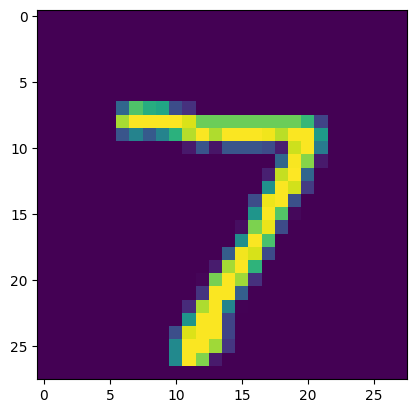

In [16]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred= model.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [19]:
Y_pred.shape

(10000, 10)

In [20]:
print(Y_pred[0])

[1.0936300e-11 1.7261859e-10 1.7960647e-11 1.5037442e-09 5.3643013e-14
 1.7794009e-11 6.7901225e-17 9.9999994e-01 2.8846714e-13 3.6315210e-08]


model.predict() gives the prediction probability of each class for that data point

In [21]:
# converting the prediction probabilities to class label
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [22]:
# converting the prediction probabilities to class label for test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
np.unique(Y_pred_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Y_test->True labels

Y_pred_labels->Predicted labels

Confusion matrix

In [24]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 974    0    0    0    0    1    2    1    2    0]
 [   0 1130    1    1    0    1    1    0    1    0]
 [   1    1 1018    1    2    0    2    5    2    0]
 [   0    0    1  999    0    4    0    2    3    1]
 [   0    1    2    0  972    0    2    0    0    5]
 [   1    0    0    6    0  881    3    0    1    0]
 [   6    3    0    0    3    1  945    0    0    0]
 [   0    1    5    1    0    0    0 1016    2    3]
 [   4    0    1    1    0    4    0    1  958    5]
 [   1    1    0    2    9    2    0    6    4  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

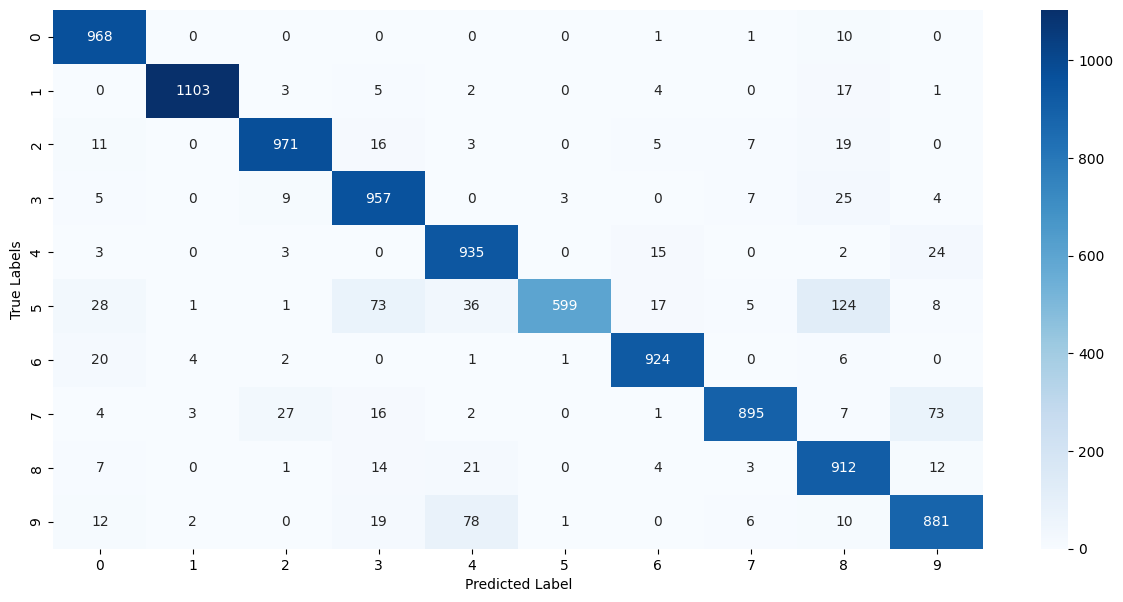

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')

Building a predictive system

In [78]:
input_image_path='/content/3.png'
input_img=cv2.imread(input_image_path)

In [79]:
type(input_img)

numpy.ndarray

In [80]:
np.shape(input_img)

(40, 40, 3)

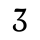

In [81]:
cv2_imshow(input_img)

In [82]:
grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [83]:
grayscale.shape

(40, 40)

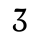

In [84]:
cv2_imshow(grayscale)

In [85]:
input_img_resized=cv2.resize(grayscale,(28,28))

In [86]:
input_img_resized.shape

(28, 28)

In [87]:
cv2_imshow(input_img_resized)

In [88]:
input_img_resized

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 248, 221, 220,
        231, 239, 242, 238, 225, 246, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 145,  35,  34,
         40,  45,  47,  44,  37, 209, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 247,  76,   8,  11,
         12,   9,   6,   0,  38, 242, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 192, 177, 182,
        183, 179, 109,   2, 119, 252, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 248,  85,  17, 214, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 186,  26, 156, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        239,  31, 120, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 226,
         79, 107, 238, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 246,  61,
         28,  91, 160, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 173,
        133,  62,  11,  34, 200, 254, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 244, 142,   0,  52, 241, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 235, 253, 255,
        255, 255, 254,  45,   0, 167, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 159,  49, 239, 255,
        255, 255, 255, 123,   0, 108, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 242,   8,  54, 244, 255,
        255, 255, 255, 128,   0, 114, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 241,   9,  27, 231, 255,
        255, 255, 240,  44,   9, 194, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254, 126,   1,  76, 230,
        255, 229,  93,   1,  99, 249, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 126,  38,  28,
         43,  26,  41, 122, 242, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 225, 198,
        191, 202, 232, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

In [89]:
input_img_resized=input_img_resized/255

In [90]:
image_reshape=np.reshape(input_img_resized,[1,28,28])

In [91]:
image_reshape.shape

(1, 28, 28)

In [76]:
input_pred=model.predict(image_reshape)
print(input_pred)

1/1 [==============================] - 0s 31ms/step
[[3.1451771e-07 1.4767262e-07 5.9400201e-05 5.1261783e-01 9.5210817e-09
  5.8256049e-04 2.8692793e-07 2.9115219e-07 4.8672965e-01 9.4605257e-06]]


In [77]:
input_pred_label=np.argmax(input_pred)
print(input_pred_label)

3
